In [1]:
import pickle
import pandas as pd
import numpy as np
import io
import shap

In [2]:
# first import the cycling data and model
file_testdata = open('../bike_data/bike_testdata.csv', 'rb')
y_test = pd.read_csv(file_testdata)

file_nn = open('../bike_data/bikeREG_nn.pkl', 'rb')
nn = pickle.load(file_nn)

\\isg2019\staff$\anna\feature\venvReduced2\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MLPRegressor from version 1.4.1.post1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [28]:
INDEX = 36
item = y_test.iloc[[INDEX]]
"prediction: " + str(nn.predict(item))

'prediction: [403.7558601]'

In [29]:
means = y_test.mean().to_frame().T
explainer = shap.Explainer(nn.predict, means)
expl = explainer(item)

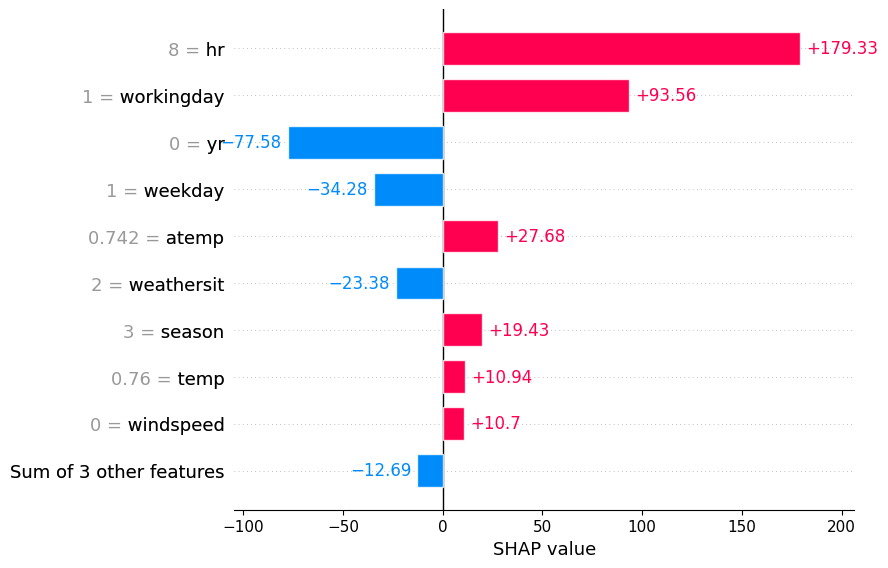

In [30]:
shap.plots.bar(expl[0])